In [1]:
import pandas as pd

# Replace 'path_to_file.csv' with the actual path to your dataset
data = pd.read_csv('heart.csv')

# Display the first few rows of the dataset
print(data.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [3]:
# Check for missing values
print(data.isnull().sum())


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [5]:
# Example: Fill missing numerical values with the column mean
data.fillna(data.mean(), inplace=True)

# For categorical columns, you can use mode
# data['categorical_column'].fillna(data['categorical_column'].mode()[0], inplace=True)


In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])


In [9]:
# Example: One-hot encoding for categorical columns
data = pd.get_dummies(data, drop_first=True)


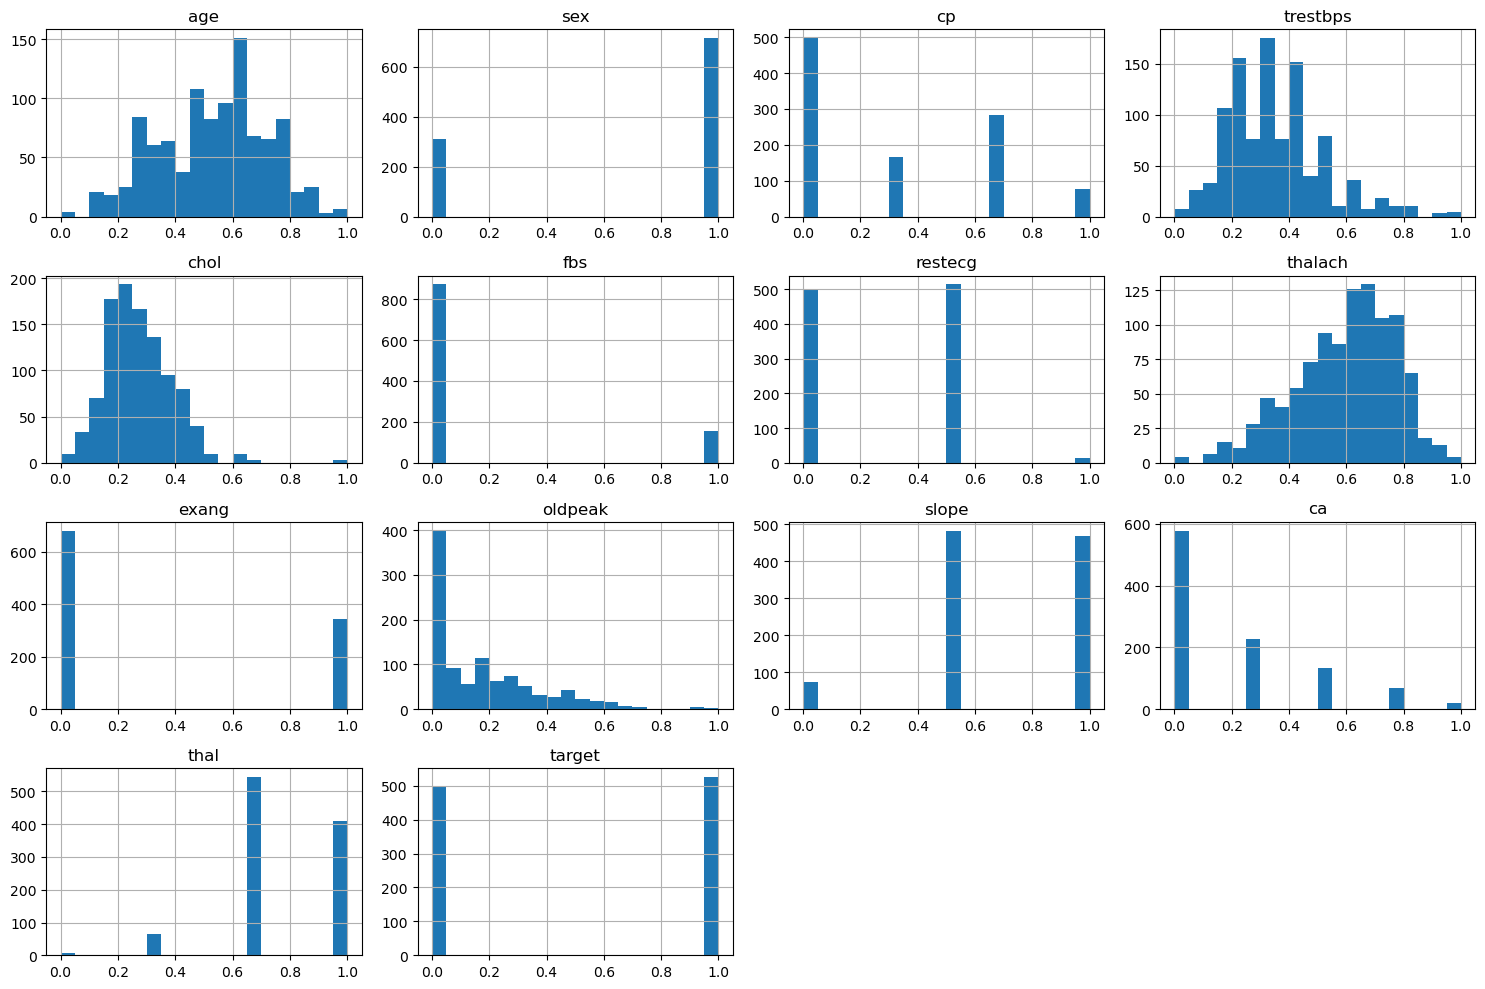

In [11]:
import matplotlib.pyplot as plt

data.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()


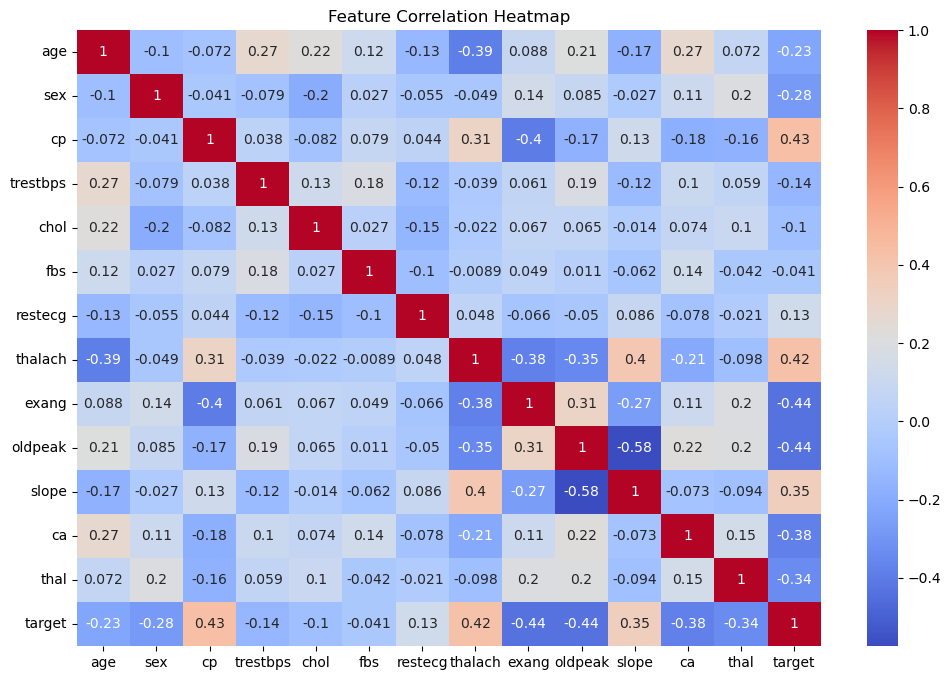

In [13]:
import seaborn as sns

correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


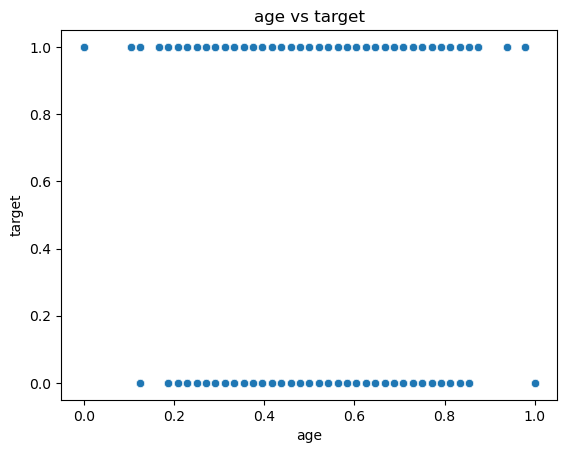

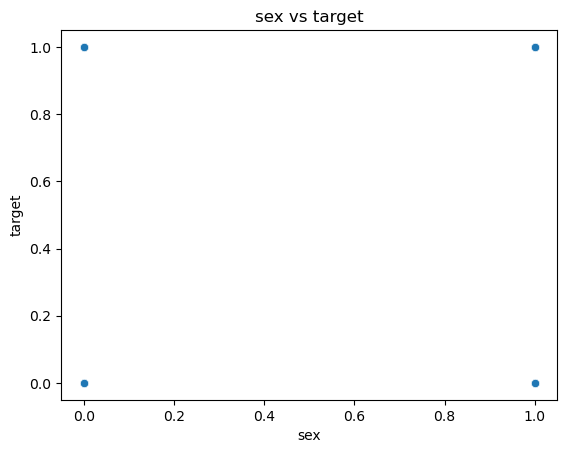

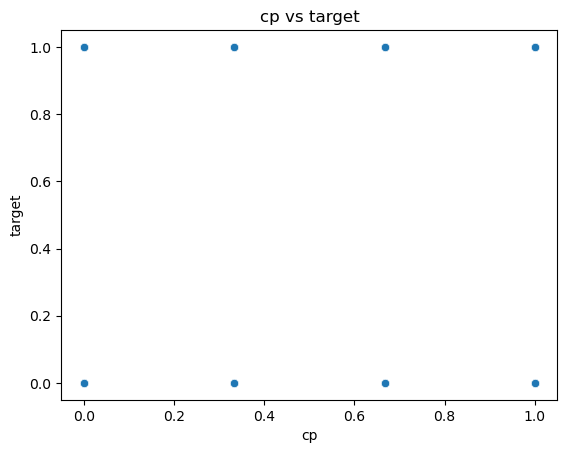

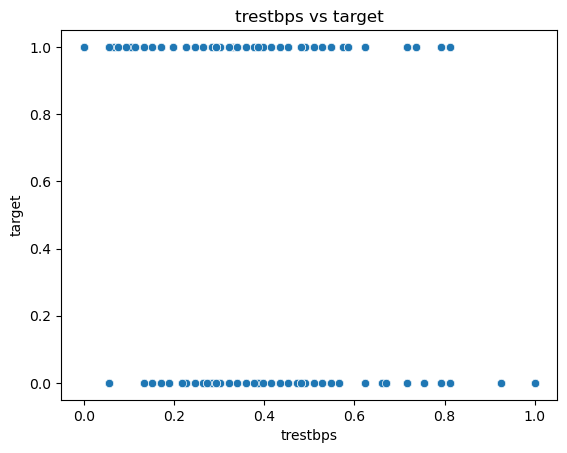

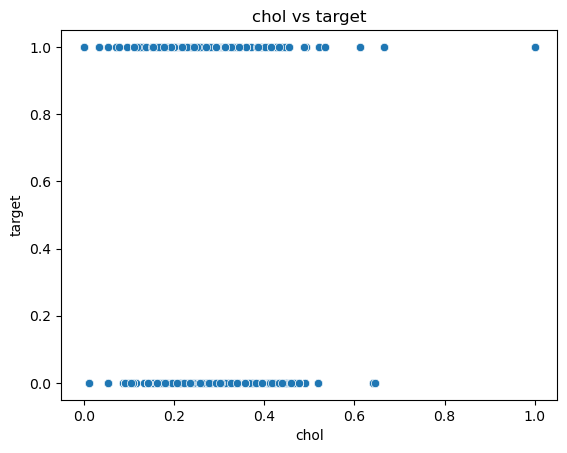

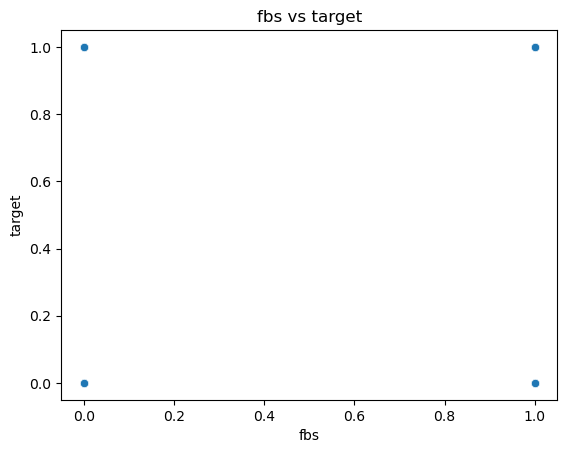

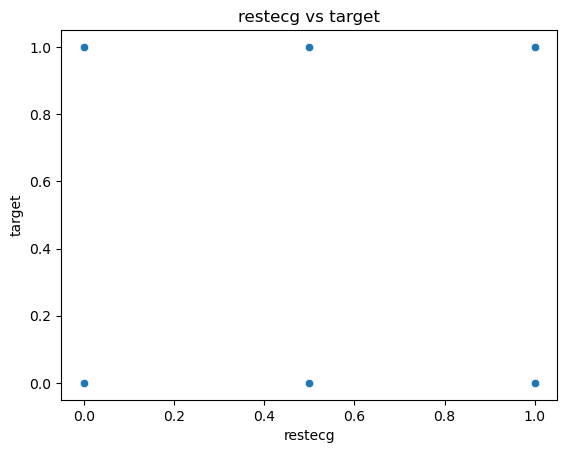

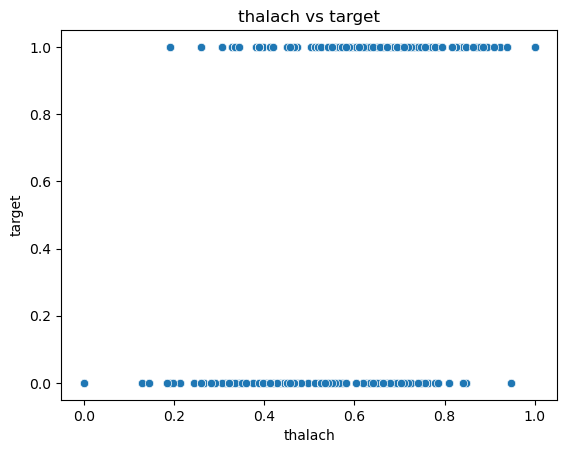

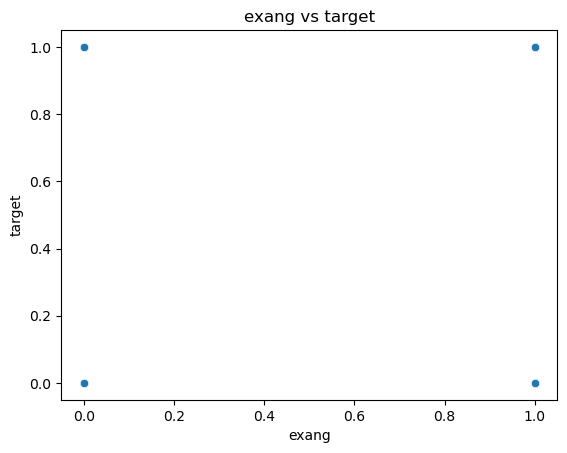

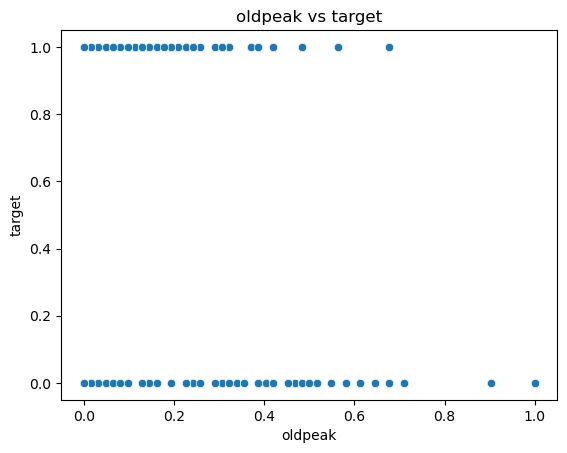

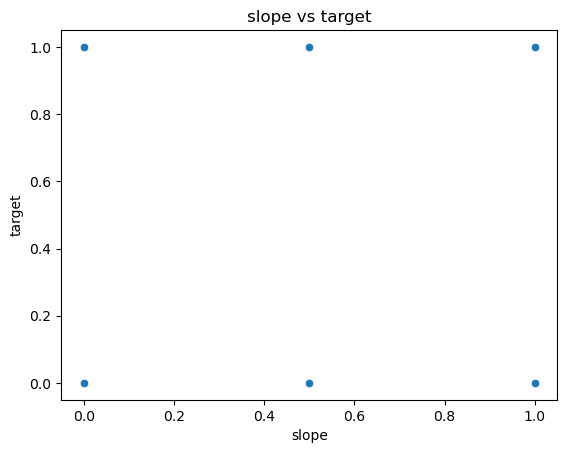

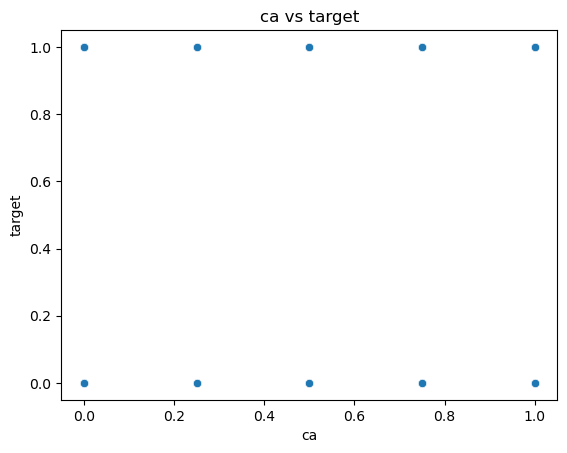

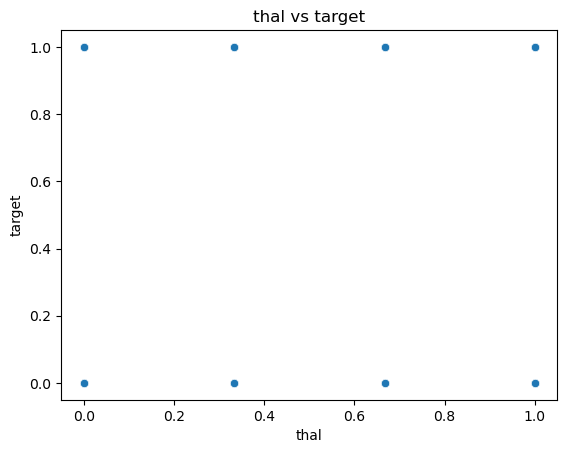

In [15]:
# Replace 'target_column' with the actual name of your target variable
target_column = 'target'  # Example: 'Outcome' for diabetes dataset
for col in data.columns:
    if col != target_column:
        plt.figure()
        sns.scatterplot(x=data[col], y=data[target_column])
        plt.title(f"{col} vs {target_column}")
        plt.show()


In [21]:
print(data.columns)


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [23]:
# Splitting the dataset into features (X) and target (y)
X = data.drop(columns=['target'])  # Features
y = data['target']  # Target

# Splitting into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize and train Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predict on the test set
log_reg_predictions = log_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression Model Performance:")
print(classification_report(y_test, log_reg_predictions))


Logistic Regression Model Performance:
              precision    recall  f1-score   support

         0.0       0.88      0.73      0.80       102
         1.0       0.77      0.90      0.83       103

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205



In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize and train Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
rf_predictions = rf.predict(X_test)

# Evaluate the model
print("Random Forest Model Performance:")
print(classification_report(y_test, rf_predictions))


Random Forest Model Performance:
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99       102
         1.0       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [29]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Initialize and train SVM model
svm = SVC(random_state=42)
svm.fit(X_train, y_train)

# Predict on the test set
svm_predictions = svm.predict(X_test)

# Evaluate the model
print("Support Vector Machine (SVM) Model Performance:")
print(classification_report(y_test, svm_predictions))


Support Vector Machine (SVM) Model Performance:
              precision    recall  f1-score   support

         0.0       0.88      0.85      0.87       102
         1.0       0.86      0.88      0.87       103

    accuracy                           0.87       205
   macro avg       0.87      0.87      0.87       205
weighted avg       0.87      0.87      0.87       205



In [31]:
# Collecting performance metrics for each model
from sklearn.metrics import accuracy_score

# Evaluate accuracy for each model
log_reg_accuracy = accuracy_score(y_test, log_reg_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)
svm_accuracy = accuracy_score(y_test, svm_predictions)

# Print out the accuracy comparison
print("Model Comparison (Accuracy):")
print(f"Logistic Regression Accuracy: {log_reg_accuracy:.4f}")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"SVM Accuracy: {svm_accuracy:.4f}")


Model Comparison (Accuracy):
Logistic Regression Accuracy: 0.8146
Random Forest Accuracy: 0.9854
SVM Accuracy: 0.8683


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset 
df = pd.read_csv('heart.csv')

# Check the columns to ensure 'readmitted' is not present
print(df.columns)

# Separate the features (X) and the target (y) for disease prediction
X = df.drop(columns=['target'])  # Dropping the target column for features
y_disease = df['target']  # Target column for disease prediction

# Simulate a readmission column (this is for demonstration)
# We create a synthetic 'readmitted' column based on some rules or random values.
# For this example, we assume patients with age > 60 or high cholesterol are more likely to be readmitted.
df['readmitted'] = np.where((df['age'] > 60) | (df['chol'] > 250), 1, 0)

# Separate the readmission target (y) for the readmission prediction
y_readmission = df['readmitted']

# Split the data into training and testing sets for both tasks
X_train, X_test, y_disease_train, y_disease_test, y_readmission_train, y_readmission_test = train_test_split(
    X, y_disease, y_readmission, test_size=0.3, random_state=42
)

# Define the preprocessing pipeline for numerical and categorical features
numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Apply transformations for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# Create a pipeline for disease prediction
disease_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Create a pipeline for readmission prediction
readmission_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train the disease prediction model
disease_model_pipeline.fit(X_train, y_disease_train)

# Train the readmission prediction model
readmission_model_pipeline.fit(X_train, y_readmission_train)

# Predict on the test set for disease prediction
y_disease_pred = disease_model_pipeline.predict(X_test)

# Predict on the test set for readmission prediction
y_readmission_pred = readmission_model_pipeline.predict(X_test)

# Evaluate the disease prediction model
print("Disease Prediction Accuracy:")
print(accuracy_score(y_disease_test, y_disease_pred))
print(classification_report(y_disease_test, y_disease_pred))

# Evaluate the readmission prediction model
print("Readmission Prediction Accuracy:")
print(accuracy_score(y_readmission_test, y_readmission_pred))
print(classification_report(y_readmission_test, y_readmission_pred))


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
Disease Prediction Accuracy:
0.9902597402597403
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       159
           1       1.00      0.98      0.99       149

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308

Readmission Prediction Accuracy:
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       136
           1       1.00      1.00      1.00       172

    accuracy                           1.00       308
   macro avg       1.00      1.00      1.00       308
weighted avg       1.00      1.00      1.00       308

